# 数据分析
## 负荷周期性分析
以Area1为例

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/Area1_Load.csv')
print(data.head())
# 每一行的数据代表15分钟的间隔，需要获取每天的最大负荷、最小负荷、平均负荷
data['MaxLoad'] = data.iloc[:, 1:97].max(axis=1)
data['MinLoad'] = data.iloc[:, 1:97].min(axis=1)
data['MeanLoad'] = data.iloc[:, 1:97].mean(axis=1)
print(data.head())

          YMD        T0000        T0015        T0030        T0045  \
0  2009-01-01  3210.842464  3104.507008  3037.705984  2960.176288   
1  2009-01-02  2163.988288  2074.737568  1999.624960  1950.288448   
2  2009-01-03  3109.127008  3015.901120  2938.305664  2869.375744   
3  2009-01-04  3307.752544  3209.726368  3125.514016  3075.184864   
4  2009-01-05  3295.415776  3278.379328  3232.313632  3160.731232   

         T0100        T0115        T0130        T0145        T0200  ...  \
0  2889.226528  2827.697728  2772.514336  2720.470720  2666.586688  ...   
1  1889.142112  1846.489600  1800.414304  1778.308000  1746.278368  ...   
2  2815.772224  2777.295616  2725.377568  2704.334464  2665.855744  ...   
3  3028.708768  2995.458208  2956.236256  2926.631392  2893.666048  ...   
4  3124.226368  3092.294176  3064.081312  3034.584256  3007.335136  ...   

         T2130        T2145        T2200        T2215        T2230  \
0  3035.577568  3020.254336  2969.500960  2906.131840  2830.1513

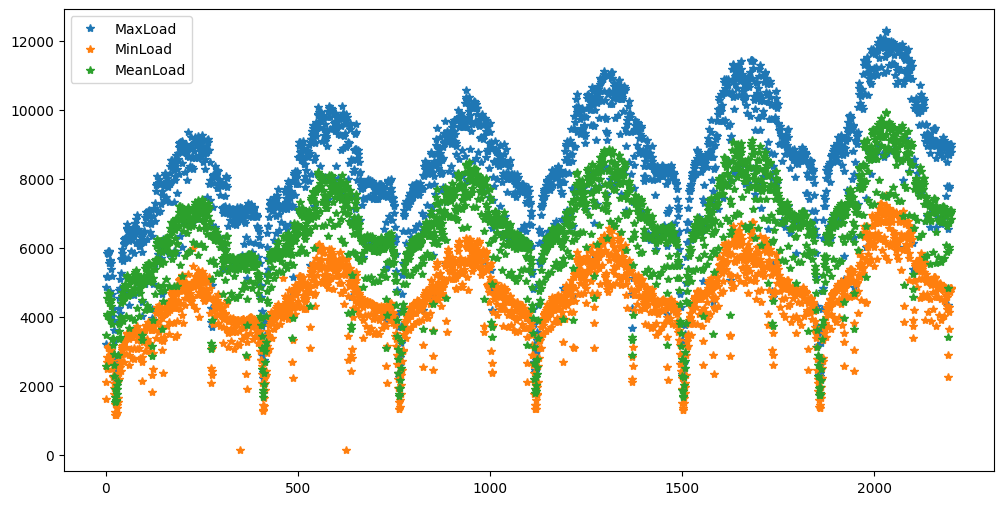

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(data['MaxLoad'], marker='*', linestyle='None', label='MaxLoad')
plt.plot(data['MinLoad'], marker='*', linestyle='None', label='MinLoad')
plt.plot(data['MeanLoad'], marker='*', linestyle='None', label='MeanLoad')
plt.legend()
plt.show()

对比论文图片，发现存在为0的最小负荷

需要对缺失数据进行处理

![image.png](image\thesis\20240329151248708.png)

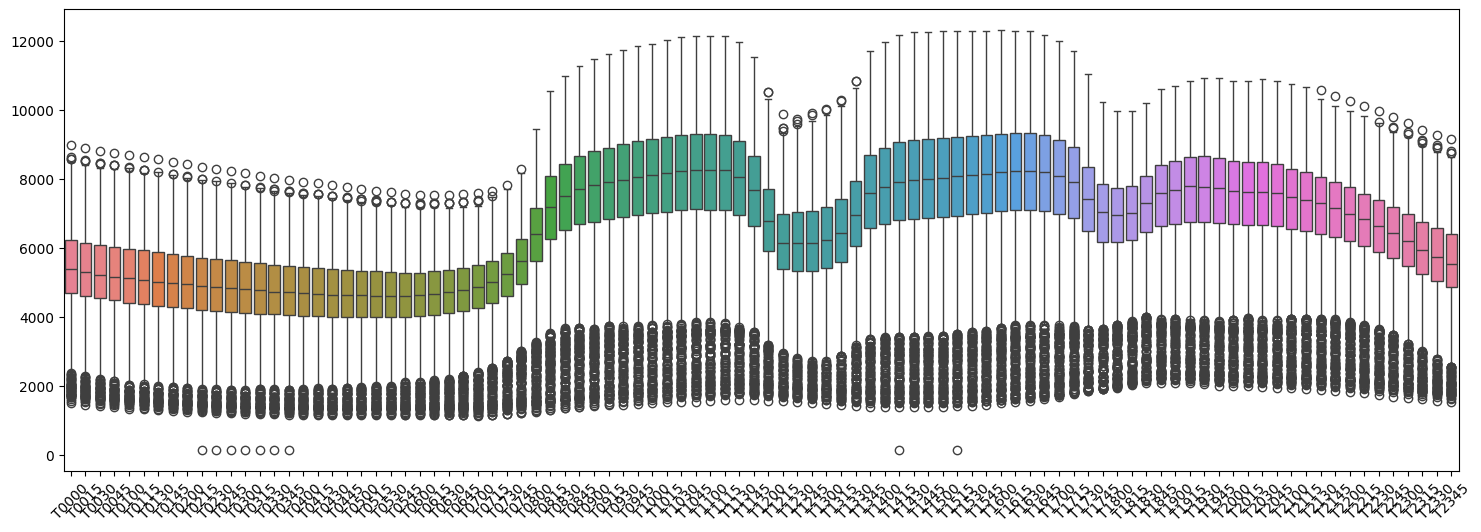

In [34]:
# 针对原数据的异常值进行处理
data.describe()

plt.figure(figsize=(18, 6))
sns.boxplot(data=data.iloc[:, 1:97])
plt.xticks(rotation=45)
plt.show()


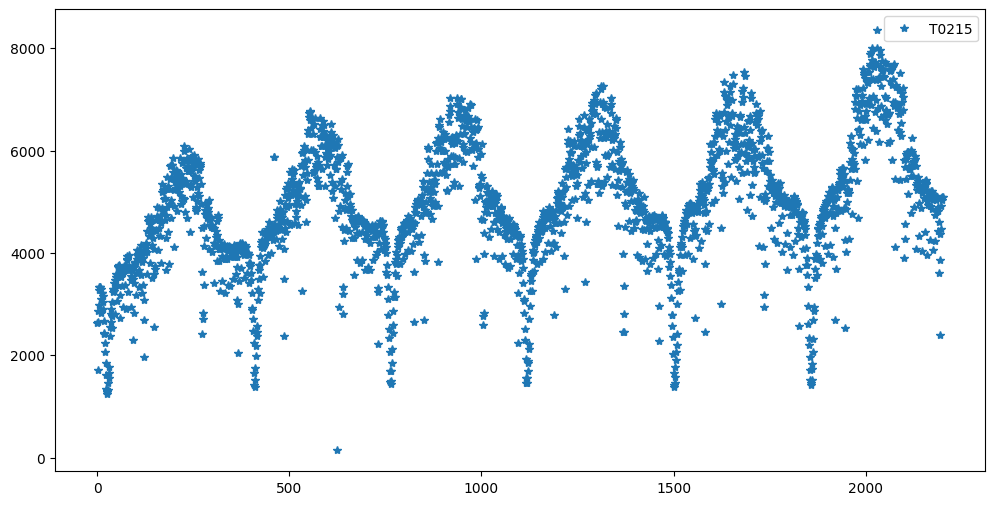

count    2201.000000
mean     4926.687159
std      1218.506330
min      1237.793824
25%      4202.440000
50%      4898.352832
75%      5718.603904
max      8350.854016
Name: T0215, dtype: float64

In [35]:
# 可以得出T0215~T0345，T1415，T1515存在异常值
# 查看异常值列的具体数据
data['T0215'].describe()
# 画图
plt.figure(figsize=(12, 6))
plt.plot(data['T0215'], marker='*', linestyle='None', label='T0215')
plt.legend()
plt.show()
# 将异常值替换为前一个值
data['T0215'] = np.where(data['T0215'] < 1000, data['T0215'].shift(1), data['T0215'])
data['T0215'].describe()


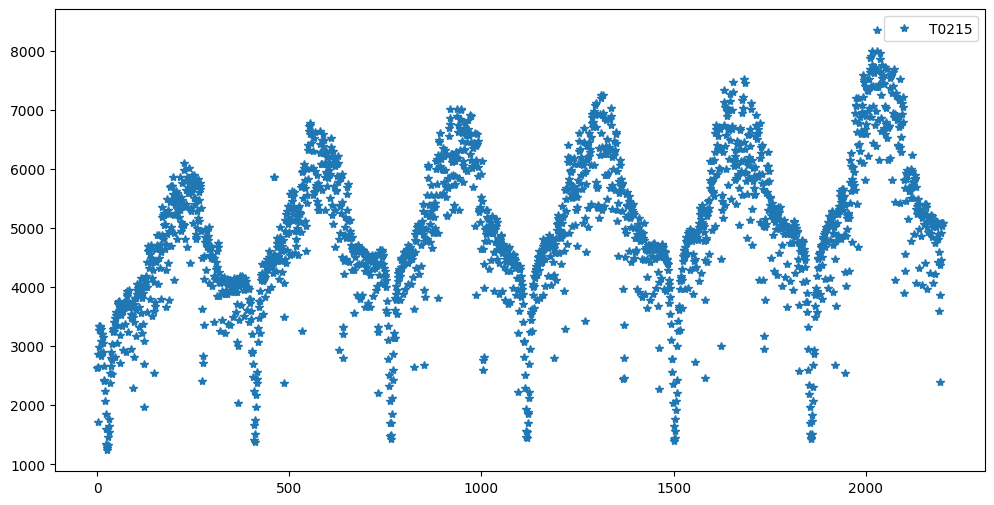

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(data['T0215'], marker='*', linestyle='None', label='T0215')
plt.legend()
plt.show()

In [37]:
# 其他列同理T0215~T0345，T1415，T1515
data['T0230'] = np.where(data['T0230'] < 1000, data['T0230'].shift(1), data['T0230'])
data['T0245'] = np.where(data['T0245'] < 1000, data['T0245'].shift(1), data['T0245'])
data['T0300'] = np.where(data['T0300'] < 1000, data['T0300'].shift(1), data['T0300'])
data['T0315'] = np.where(data['T0315'] < 1000, data['T0315'].shift(1), data['T0315'])
data['T0330'] = np.where(data['T0330'] < 1000, data['T0330'].shift(1), data['T0330'])
data['T0345'] = np.where(data['T0345'] < 1000, data['T0345'].shift(1), data['T0345'])
data['T1415'] = np.where(data['T1415'] < 1000, data['T1415'].shift(1), data['T1415'])
data['T1515'] = np.where(data['T1515'] < 1000, data['T1515'].shift(1), data['T1515'])


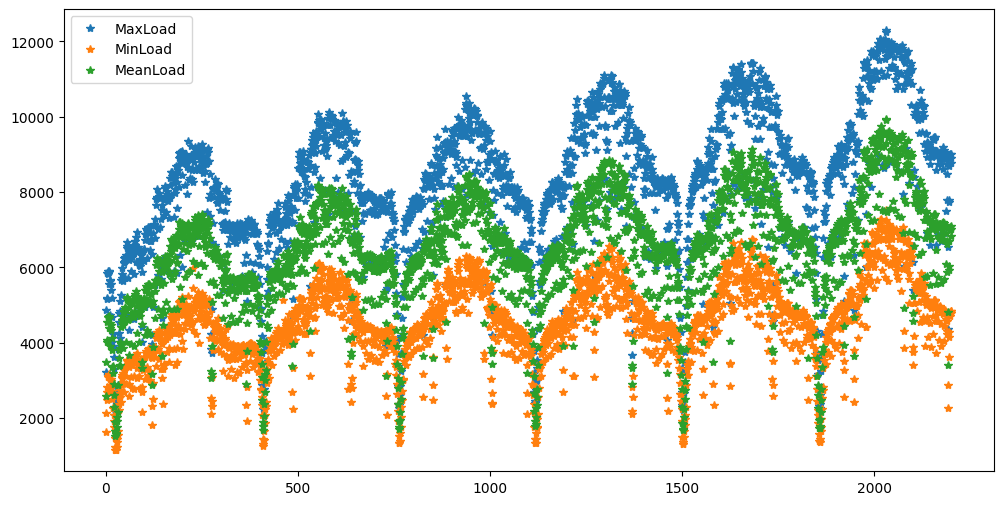

<Figure size 640x480 with 0 Axes>

In [38]:
data['MaxLoad'] = data.iloc[:, 1:97].max(axis=1)
data['MinLoad'] = data.iloc[:, 1:97].min(axis=1)
data['MeanLoad'] = data.iloc[:, 1:97].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(data['MaxLoad'], marker='*', linestyle='None', label='MaxLoad')
plt.plot(data['MinLoad'], marker='*', linestyle='None', label='MinLoad')
plt.plot(data['MeanLoad'], marker='*', linestyle='None', label='MeanLoad')
plt.legend()
plt.show()
# 保存处理后的数据
data.to_csv('data/Area1_Load_clean.csv', index=False)

# 季节负荷周期性分析

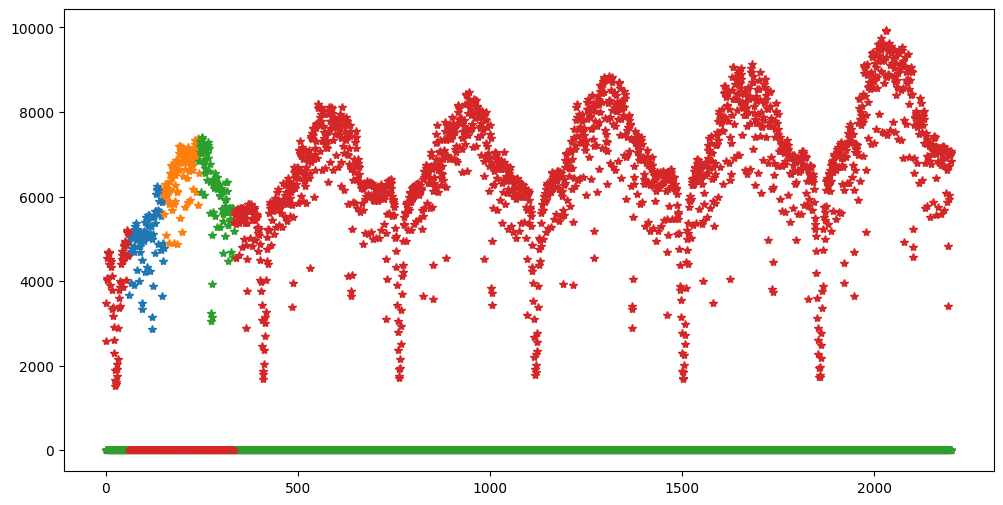

In [47]:
# 对处理后的数据进行季节性分析
data = pd.read_csv('data/Area1_Load_clean.csv')
# 日期列已经为datetime类型
data['Spring'] = np.where((data['YMD'] >= '2009-03-01') & (data['YMD'] < '2009-06-01'), 1, 0)
data['Summer'] = np.where((data['YMD'] >= '2009-06-01') & (data['YMD'] < '2009-09-01'), 1, 0)
data['Autumn'] = np.where((data['YMD'] >= '2009-09-01') & (data['YMD'] < '2009-12-01'), 1, 0)
data['Winter'] = np.where((data['YMD'] >= '2009-12-01') | (data['YMD'] < '2009-03-01'), 1, 0)
